# Exploring Beta-Binomial using GTEx Whole Blood allele-specific-expression dataset:

In [1]:
library(dplyr)
library(ggplot2)

blood_gtex <- read.csv('~/Desktop/WHLBLD.5.3.10.meta.noSupDups_gte90.bed.csv', sep="\t", header=T)
head(blood_gtex)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



CHR,POS,POS_2,VARIANT_ID,REF_ALLELE,ALT_ALLELE,SAMPLE_ID,SUBJECT_ID,TISSUE_ID,REF_COUNT,⋯,REF_RATIO,a.GENE_ID,indiv_count,snp_count,rd_score,rd_median,snpRD_diff,GENE_NUM_OBS,madRD_all,madRD_masterSNP
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-11WQC-0006-SM-5LZVP,GTEX-11WQC,WHLBLD,44,⋯,0.3055556,ENSG00000187608,17,3,0.15123457,0.2658691,0.11463457,121,0.02812446,0.01162767
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-12126-0006-SM-5O9B8,GTEX-12126,WHLBLD,380,⋯,0.4245810,ENSG00000187608,17,3,0.02275210,0.2658691,0.24311704,121,0.02812446,0.01162767
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-12584-0005-SM-5N9GM,GTEX-12584,WHLBLD,7,⋯,0.2058824,ENSG00000187608,17,3,0.34602076,0.2658691,0.08015162,121,0.02812446,0.01162767
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-12WSJ-0005-SM-5LU8S,GTEX-12WSJ,WHLBLD,0,⋯,0.0000000,ENSG00000187608,17,3,1.00000000,0.2658691,0.73413086,121,0.02812446,0.01162767
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-13CF2-0006-SM-5O99L,GTEX-13CF2,WHLBLD,86,⋯,0.3856502,ENSG00000187608,17,3,0.05230348,0.2658691,0.21356566,121,0.02812446,0.01162767
1,948921,948921,1_948921_T_C_b37,T,C,GTEX-13FTZ-0005-SM-5NQ9N,GTEX-13FTZ,WHLBLD,19,⋯,0.3220339,ENSG00000187608,17,3,0.12668773,0.2658691,0.13918141,121,0.02812446,0.01162767


# Subset data such that each row is a SNP and each column is an individual.

In [2]:
#subset data columns 
snp_subject <- blood_gtex %>% select(VARIANT_ID, SUBJECT_ID, REF_COUNT, TOTAL_COUNT)

#reshape matrix so each row is a SNP and each pair of columns is an individual 
#suppressWarnings b/c multiple rows match for SUBJECT_ID, it will just take the first one. 
shape_matrix = suppressWarnings({as.matrix(reshape(snp_subject, timevar = "SUBJECT_ID", idvar="VARIANT_ID", direction = "wide"))})

In [26]:
#indicate which columns are REF and TOT:
cols <- colnames(shape_matrix)
ref_cols <- cols[grepl("REF_COUNT.", cols)]
tot_cols <- cols[grepl("TOTAL_COUNT.", cols)]

#specify REF cols as 'y' and TOT cols as 'tot':
y <- shape_matrix[,c(ref_cols)]
colnames(y) <- gsub("REF_COUNT.", "", colnames(y))
tot <- shape_matrix[,c(tot_cols)]
colnames(tot) <- gsub("TOTAL_COUNT.", "", colnames(tot))
head(y)
head(tot)

,GTEX-11WQC,GTEX-12126,GTEX-12584,GTEX-12WSJ,GTEX-13CF2,GTEX-13FTZ,GTEX-13FXS,GTEX-13W3W,GTEX-Y3IK,GTEX-Y8E4,⋯,GTEX-ZDTS,GTEX-13VXU,GTEX-ZVE2,GTEX-111YS,GTEX-Y8LW,GTEX-12WSM,GTEX-11EM3,GTEX-11UD2,GTEX-ZG7Y,GTEX-XYKS
1,44,380,7,0,86,19,36,2,26,31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,38,NA,NA,NA,NA,NA,29,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98,45,724,10,0,111,16,38,3,16,29,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
122,11,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
137,18,NA,NA,NA,4,NA,NA,21,9,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
178,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,GTEX-11WQC,GTEX-12126,GTEX-12584,GTEX-12WSJ,GTEX-13CF2,GTEX-13FTZ,GTEX-13FXS,GTEX-13W3W,GTEX-Y3IK,GTEX-Y8E4,⋯,GTEX-ZDTS,GTEX-13VXU,GTEX-ZVE2,GTEX-111YS,GTEX-Y8LW,GTEX-12WSM,GTEX-11EM3,GTEX-11UD2,GTEX-ZG7Y,GTEX-XYKS
1,144,895,34,15,223,59,111,10,73,128,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,149,NA,NA,NA,NA,NA,102,26,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98,163,1166,33,13,315,75,120,33,68,134,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
122,17,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
137,33,NA,NA,NA,17,NA,NA,33,24,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
178,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Estimate Proportions and plot them per-SNP

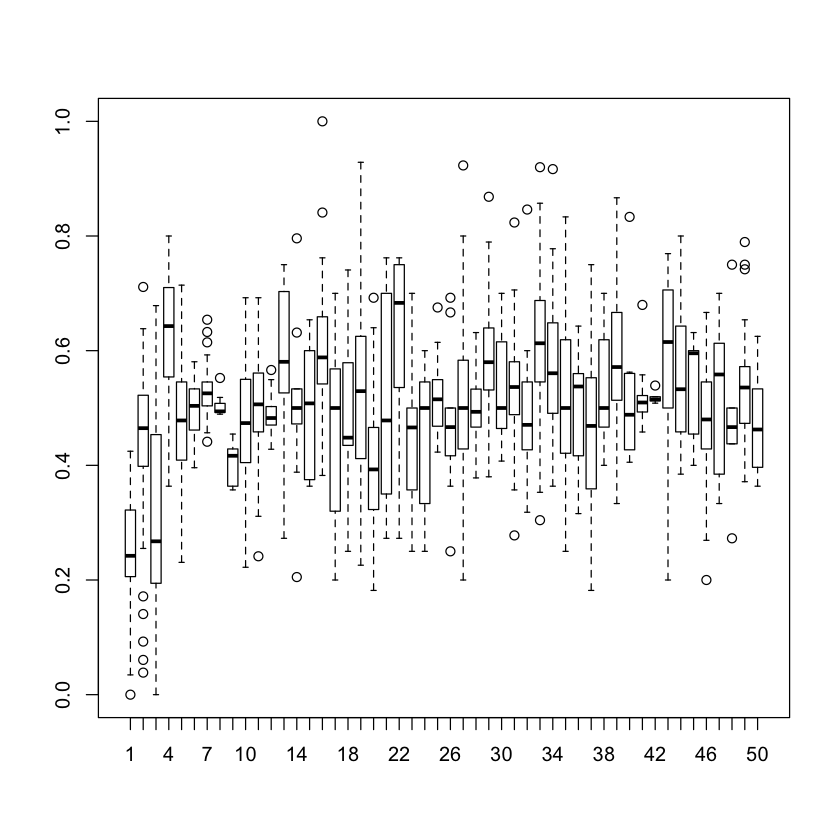

In [4]:
p <- matrix(as.numeric(y))/matrix(as.numeric(tot))
p <- matrix(p, nrow=7150, ncol=156)
boxplot(t(p)[,1:50])

# Use MLE beta binomial dispersion estimate:

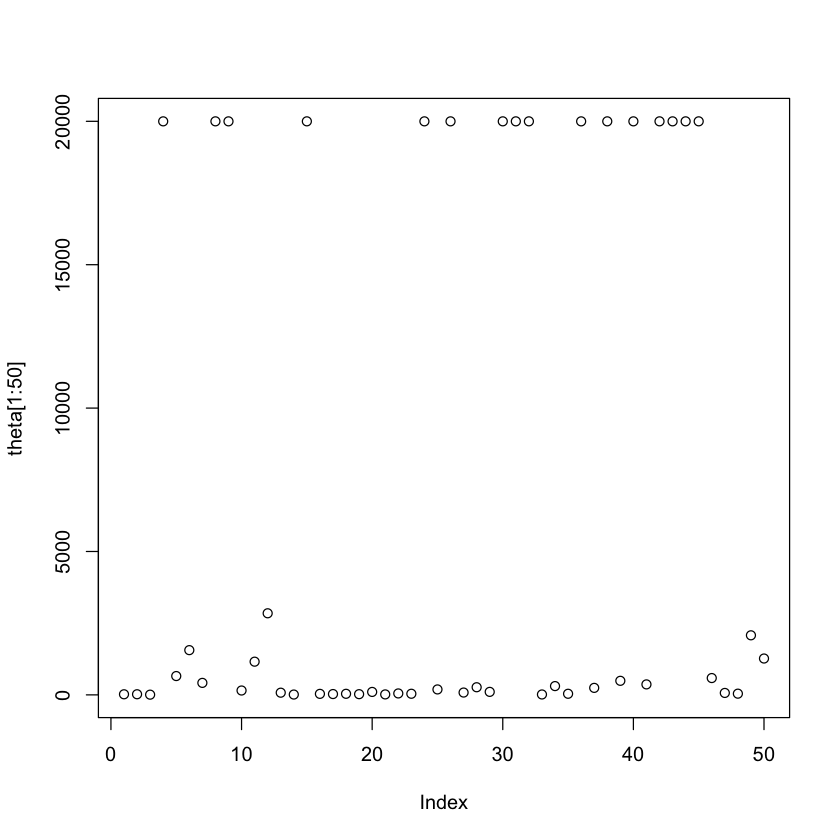

In [5]:
library(apeglm)
# mean of REF/TOT ratios:
p.hat <- rowMeans(p, na.rm=TRUE)

# weight 0 if not HET, 1 if HET:
weights <- matrix(y,nrow=nrow(y), ncol=ncol(y))
weights[!is.na(weights)] <- as.integer(1)
weights[is.na(weights)] <- as.integer(0)

# if not HET, fill REF with "1"
y[is.na(y)] <- as.integer(1)

# if not HET, fill TOT with "1"
tot[is.na(tot)] <- as.integer(1)

# matrix for bbEstDisp:
x <- matrix(1,nrow=ncol(y),ncol=1)

class(y) <- "numeric"
class(tot) <- "numeric"
class(weights) <- "numeric"
beta.hat <- log(p.hat / (1 - p.hat)) #log ratio of the estimate
theta <- bbEstDisp(success=y, size=tot,
                   x=x, beta.hat,
                   weights=weights,
                   minDisp=.01, maxDisp=20000)
#theta <- bbEstDisp(success=y, size=tot, weights=weights, x=x, beta.hat, minDisp=.01, maxDisp=500)
plot(theta[1:50])

# Plot the distribution of thetas (log scale)

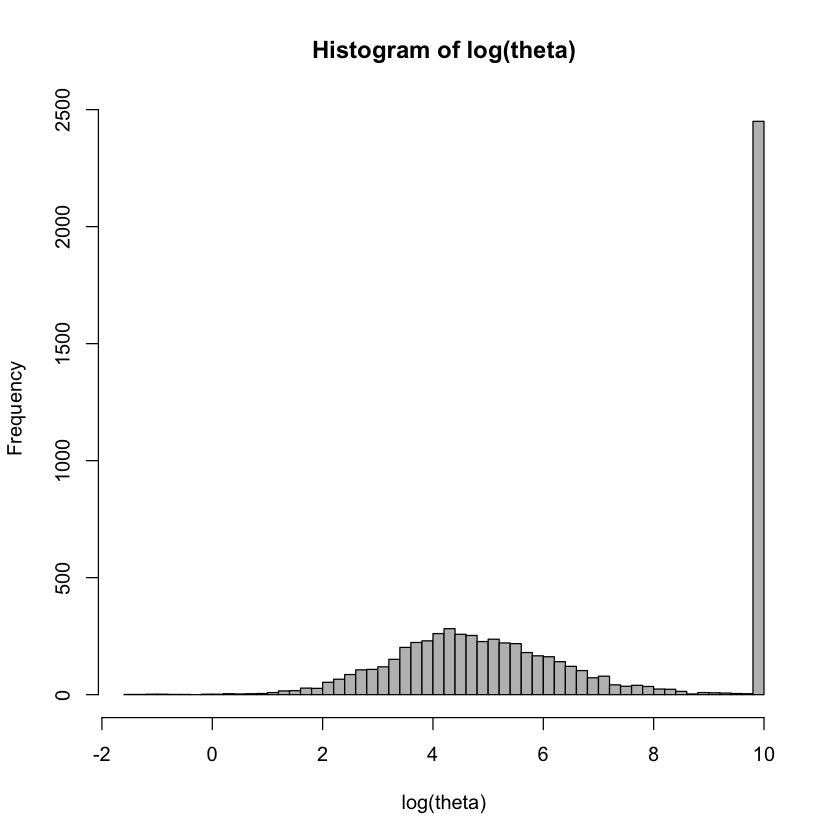

In [6]:
hist(log(theta),breaks=50,col="grey")

# Plot log(theta) vs. the mean total read counts:

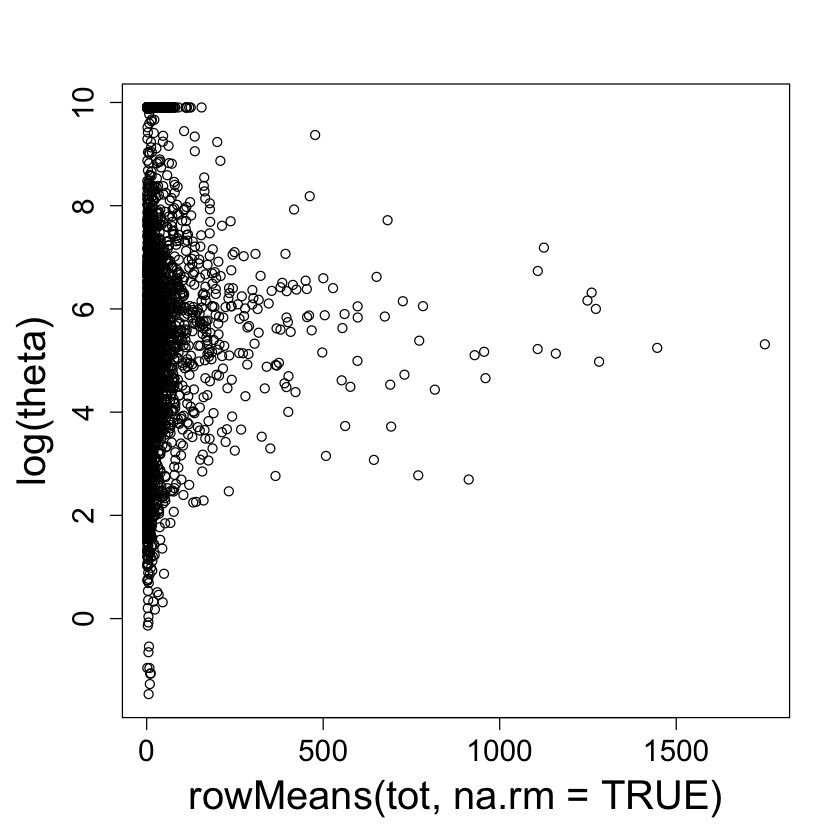

In [7]:
library(rafalib)
bigpar()
plot(rowMeans(tot, na.rm=TRUE), log(theta))

# Consider a local FDR type approach and plot the local FDR's for the first 50 SNPs::

In [8]:
library(locfdr)

# throws error because middle of the histogram is non-normal:
fit1 <- locfdr(log(theta), nulltype=1)

bigpar()
plot(-log10(fit1$fdr[1:50]), ylab="-log10 local FDR")

Warning message in locfdr(log(theta), nulltype = 1):
“f(z) misfit = 29.9.  Rerun with increased df”Warning message in locfdr(log(theta), nulltype = 1):
“CM estimation failed, middle of histogram non-normal”

ERROR: Error in locfdr(log(theta), nulltype = 1): CM and ML Estimation failed, middle of histogram non-normal


# What are the REF/TOT (p) distributions for different ranges of theta? 

i.e. What is the “shape” of the dispersion for the SNPs with the lower theta?  That is, do they cover the full range of low and high ref/total ratios (the signal we want) or are they left or right shifted (not the signal we want)?

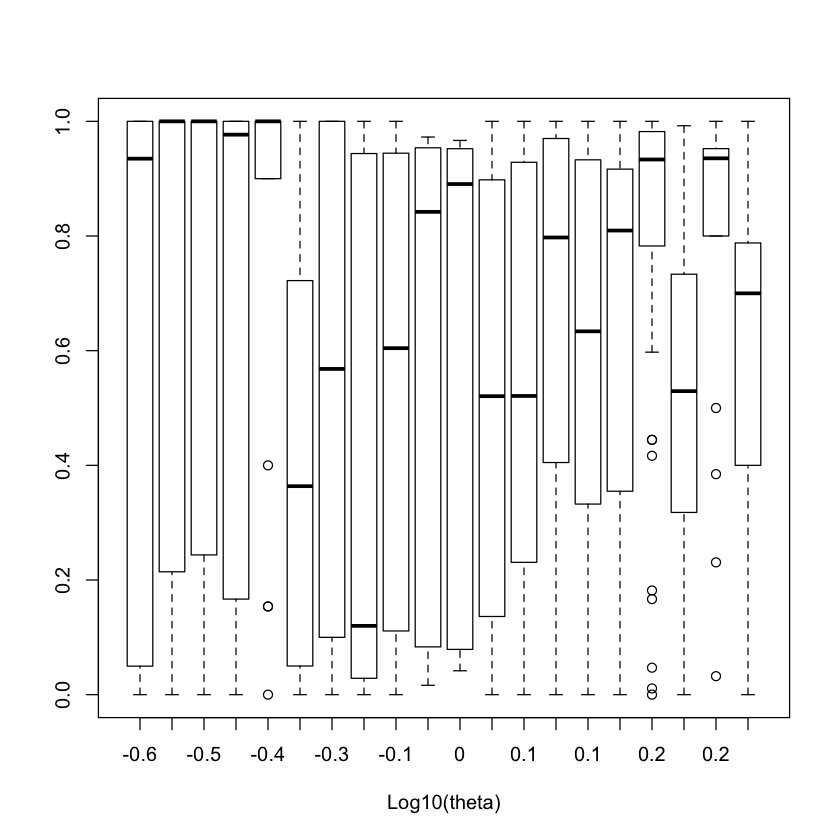

In [9]:
# tack on theta as a new column in p
p <- cbind(p, theta) 
# order by p
p <- p[order(p[,157]),]

# box plot of p for 20 snps with log(theta) < 1
tmp <- p[which(log(p[,157])<=1),]
boxplot(t(tmp)[1:156,1:20], names=round(log10(t(tmp)[157,1:20]),1), xlab="Log10(theta)")

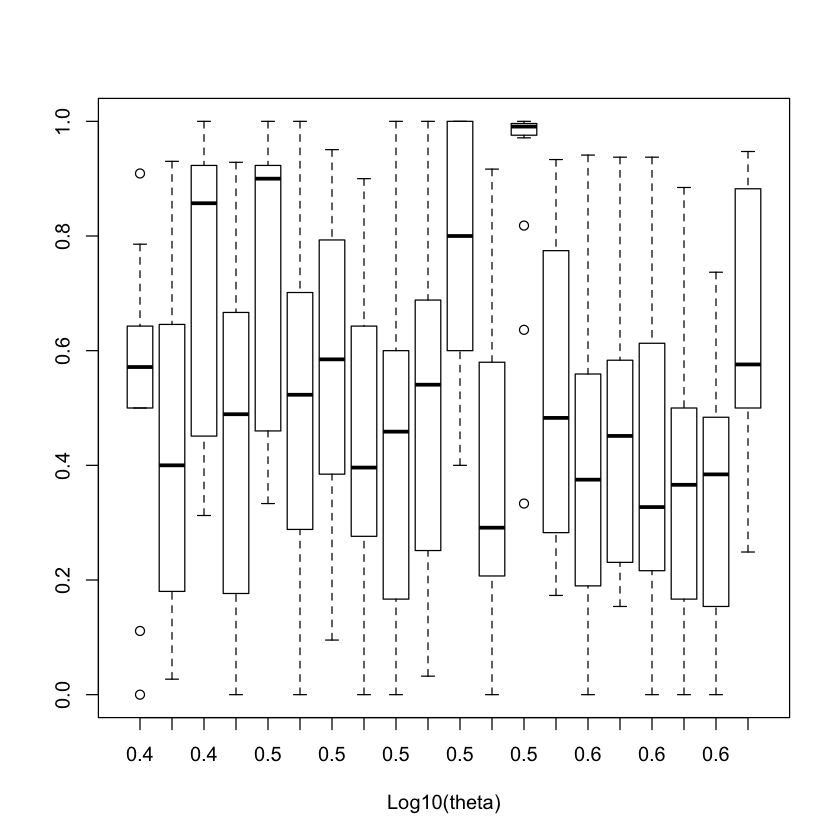

In [10]:
# box plot of p for 20 snps with log(theta) > 1 and <= 5
tmp <- p[which(log(p[,157])>1 & log(p[,157])<=5),]
boxplot(t(tmp)[1:156,1:20], names=round(log10(t(tmp)[157,1:20]),1), xlab="Log10(theta)")

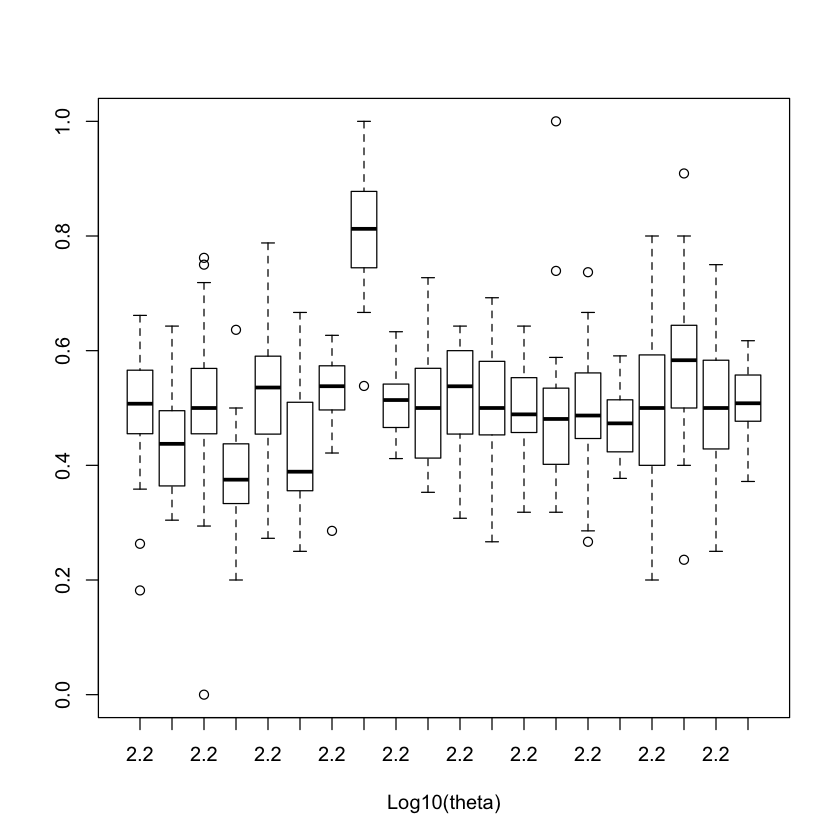

In [11]:
# box plot of p for 20 snps with log(theta) > 5 and <= 10
tmp <- p[which(log(p[,157])>5 & log(p[,157])<=10),]
boxplot(t(tmp)[1:156,1:20], names=round(log10(t(tmp)[157,1:20]),1), xlab="Log10(theta)")

# Now let's try calculating theta using ALTS/TOT, and take the difference of thetas:

The motivation being that without phasing the data, we do not know 'directionality' of REFs and ALTs. Therefore, a SNP with consistent allele bias across individuals, but the more highly expressed allele varies between REF and ALT across individuals will show high-dispersion, even though that is not the signal we want. 

In [12]:
#subset data columns 
snp_subject_alts <- blood_gtex %>% select(VARIANT_ID, SUBJECT_ID, ALT_COUNT, TOTAL_COUNT)

#reshape matrix so each row is a SNP and each pair of columns is an individual 
#suppressWarnings b/c multiple rows match for SUBJECT_ID, it will just take the first one. 
shape_matrix_alts = suppressWarnings({as.matrix(reshape(snp_subject_alts, timevar = "SUBJECT_ID", idvar="VARIANT_ID", direction = "wide"))})

#indicate which columns are REF and TOT:
cols <- colnames(shape_matrix_alts)
alt_cols <- cols[grepl("ALT_COUNT.", cols)]
tot_cols <- cols[grepl("TOTAL_COUNT.", cols)]

#specify REF cols as 'y' and TOT cols as 'tot':
alts <- shape_matrix_alts[,c(alt_cols)]
colnames(alts) <- gsub("ALT_COUNT.", "", colnames(alts))
tot <- shape_matrix_alts[,c(tot_cols)]
colnames(tot) <- gsub("TOTAL_COUNT.", "", colnames(tot))
alts
tot

,GTEX-11WQC,GTEX-12126,GTEX-12584,GTEX-12WSJ,GTEX-13CF2,GTEX-13FTZ,GTEX-13FXS,GTEX-13W3W,GTEX-Y3IK,GTEX-Y8E4,⋯,GTEX-ZDTS,GTEX-13VXU,GTEX-ZVE2,GTEX-111YS,GTEX-Y8LW,GTEX-12WSM,GTEX-11EM3,GTEX-11UD2,GTEX-ZG7Y,GTEX-XYKS
1,100,515,27,15,137,40,75,8,47,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,111,NA,NA,NA,NA,NA,73,25,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98,118,442,23,13,204,59,82,30,52,105,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
122,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
137,15,NA,NA,NA,13,NA,NA,12,15,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
178,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
208,NA,NA,NA,258,139,70,NA,429,309,282,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
272,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
281,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
286,NA,NA,NA,NA,18,NA,NA,NA,NA,25,⋯,27,NA,NA,NA,NA,NA,NA,NA,NA,NA


,GTEX-11WQC,GTEX-12126,GTEX-12584,GTEX-12WSJ,GTEX-13CF2,GTEX-13FTZ,GTEX-13FXS,GTEX-13W3W,GTEX-Y3IK,GTEX-Y8E4,⋯,GTEX-ZDTS,GTEX-13VXU,GTEX-ZVE2,GTEX-111YS,GTEX-Y8LW,GTEX-12WSM,GTEX-11EM3,GTEX-11UD2,GTEX-ZG7Y,GTEX-XYKS
1,144,895,34,15,223,59,111,10,73,128,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,149,NA,NA,NA,NA,NA,102,26,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98,163,1166,33,13,315,75,120,33,68,134,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
122,17,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
137,33,NA,NA,NA,17,NA,NA,33,24,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
178,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
208,NA,NA,NA,600,337,143,NA,889,588,602,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
272,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
281,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
286,NA,NA,NA,NA,40,NA,NA,NA,NA,42,⋯,50,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
#estimate proportions of alts/tot:
p_alt <- matrix(as.numeric(alts))/matrix(as.numeric(tot))
p_alt <- matrix(p_alt, nrow=7150, ncol=156)
#boxplot(t(p_alt)[,1:50])

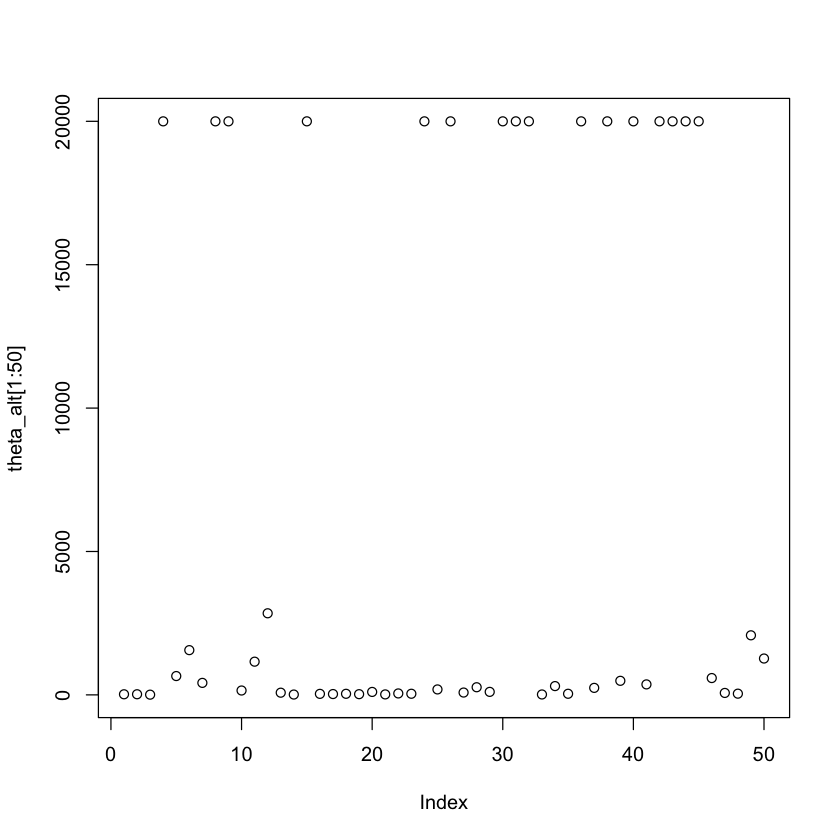

In [14]:
# Use MLE beta-binomial dispersion estimate:

library(apeglm)
# mean of REF/TOT ratios:
p_alt.hat <- rowMeans(p_alt, na.rm=TRUE)

# weight 0 if not HET, 1 if HET:
weights <- matrix(alts,nrow=nrow(alts), ncol=ncol(alts))
weights[!is.na(weights)] <- as.integer(1)
weights[is.na(weights)] <- as.integer(0)

# if not HET, fill REF with "1"
alts[is.na(alts)] <- as.integer(1)

# if not HET, fill TOT with "1"
tot[is.na(tot)] <- as.integer(1)

# matrix for bbEstDisp:
x_alt <- matrix(1,nrow=ncol(alts),ncol=1)

class(alts) <- "numeric"
class(tot) <- "numeric"
class(weights) <- "numeric"
beta_alt.hat <- log(p_alt.hat / (1 - p_alt.hat)) #log ratio of the estimate
theta_alt <- bbEstDisp(success=alts, size=tot,
                   x=x_alt, beta_alt.hat,
                   weights=weights,
                   minDisp=.01, maxDisp=20000)
plot(theta_alt[1:50])

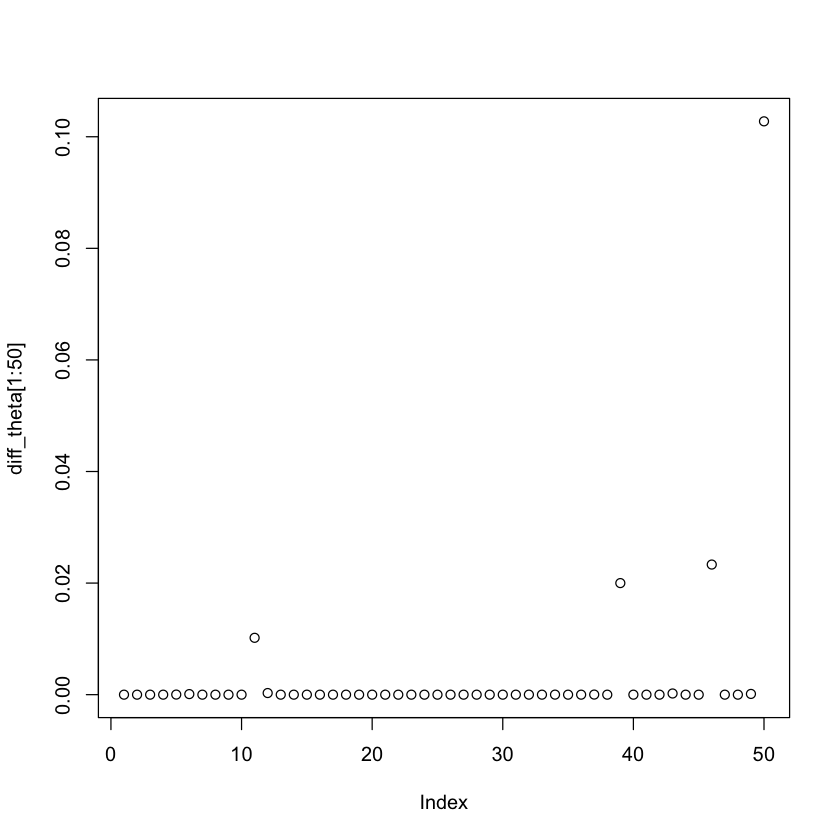

In [15]:
diff_theta <- abs(theta - theta_alt)
plot(diff_theta[1:50])

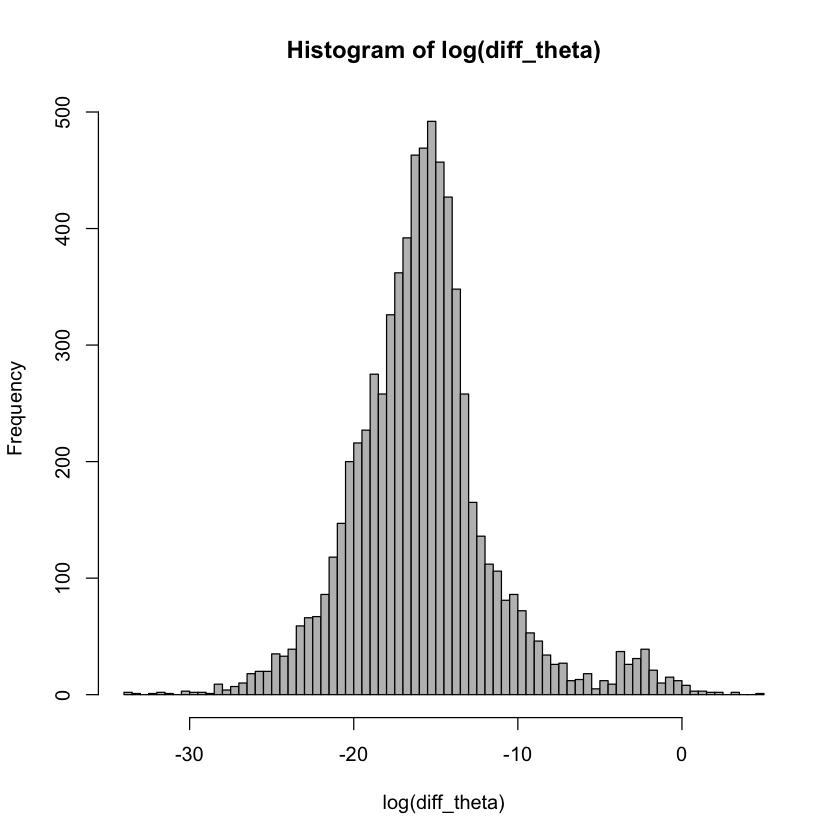

In [16]:
hist(log(diff_theta),breaks=100,col="grey")

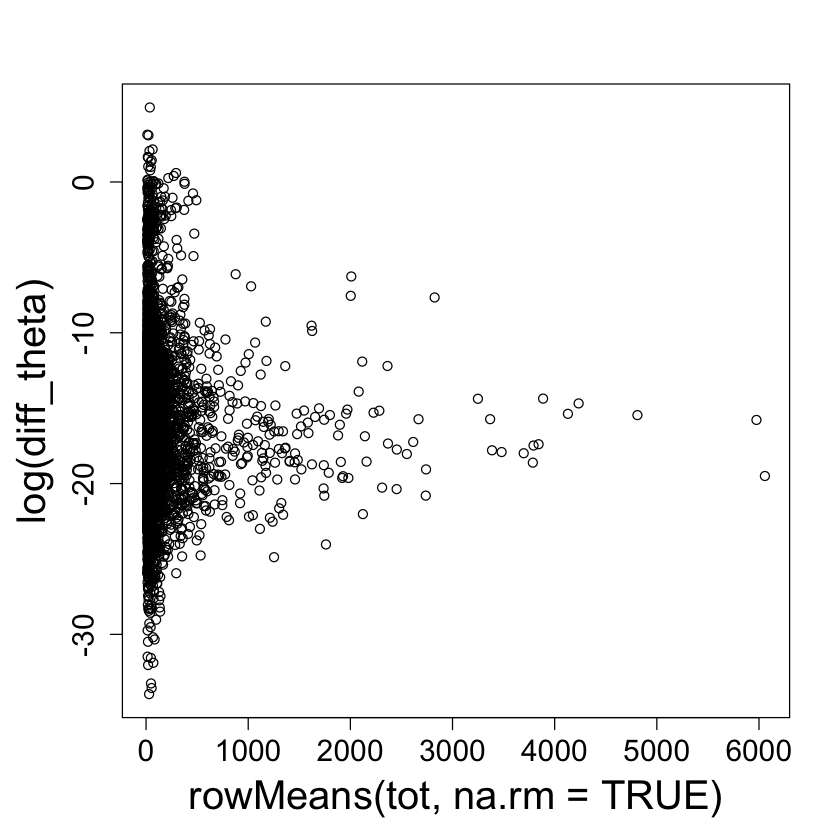

In [20]:
# MA-like-plot 
library(rafalib)
bigpar()
tot <- shape_matrix_alts[,c(tot_cols)]
colnames(tot) <- gsub("TOTAL_COUNT.", "", colnames(tot))
class(tot) <- "numeric"
plot(rowMeans(tot, na.rm = TRUE), log(diff_theta))

# Now let's look specifically at some positive and negative controls: X-chrom, imprinted genes, autosomal RME genes

In [21]:
# subset X-chrom: 
x_chrom <- shape_matrix[grep("X_", shape_matrix),]
x_chrom_alt <- shape_matrix_alts[grep("X_", shape_matrix_alts),]

#indicate which columns are REF, ALT, and TOT:
Xcols <- colnames(x_chrom)
Xcols_alt <- colnames(x_chrom_alt)

Xref_cols <- Xcols[grepl("REF_COUNT.", Xcols)]
Xalt_cols <- Xcols_alt[grepl("ALT_COUNT.", Xcols_alt)]
Xtot_cols <- Xcols[grepl("TOTAL_COUNT.", Xcols)]

#specify REF cols as 'x_ref,' ALT cols as 'x_alt', and TOT cols as 'x_tot'
# REFs, remove "REF_COUNT." from subject id:
x_ref <- x_chrom[,c(Xref_cols)]
colnames(x_ref) <- gsub("REF_COUNT.", "", colnames(x_ref))

# ALTs, remove "ALT_COUNT." from subject id:
x_alt <- x_chrom_alt[,c(Xalt_cols)]
colnames(x_alt) <- gsub("ALT_COUNT.", "", colnames(x_alt))

# TOTs, remove "TOTAL_COUNT." from subject id:
x_tot <- x_chrom[,c(Xtot_cols)]
colnames(x_tot) <- gsub("TOTAL_COUNT.", "", colnames(x_tot))



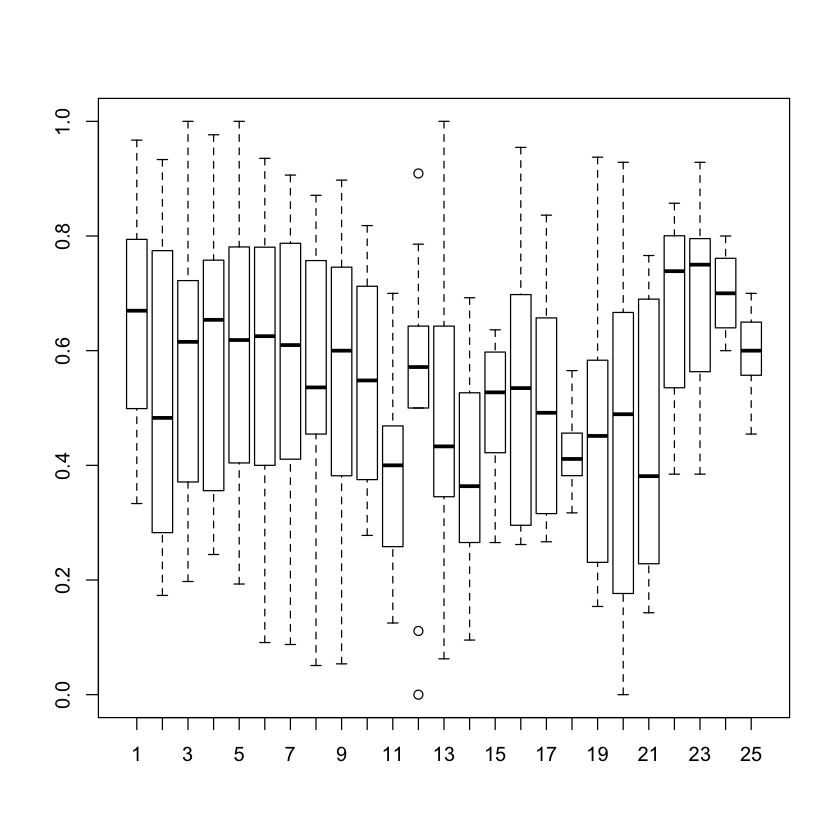

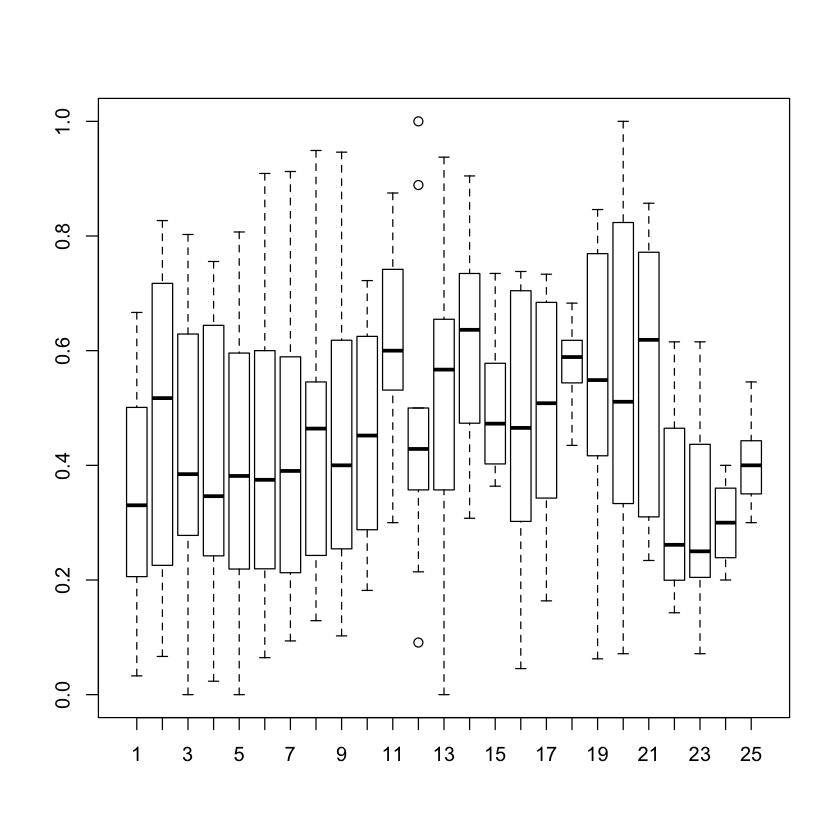

In [22]:
# Estimate proportions and plot them per SNP:

#REFs
p_x_ref <- as.numeric(x_ref)/as.numeric(x_tot)
p_x_ref <- matrix(p_x_ref, nrow=25, ncol=156)

#ALTs
p_x_alt <- as.numeric(x_alt)/as.numeric(x_tot)
p_x_alt <- matrix(p_x_alt, nrow=25, ncol=156)

boxplot(t(p_x_ref))
boxplot(t(p_x_alt))

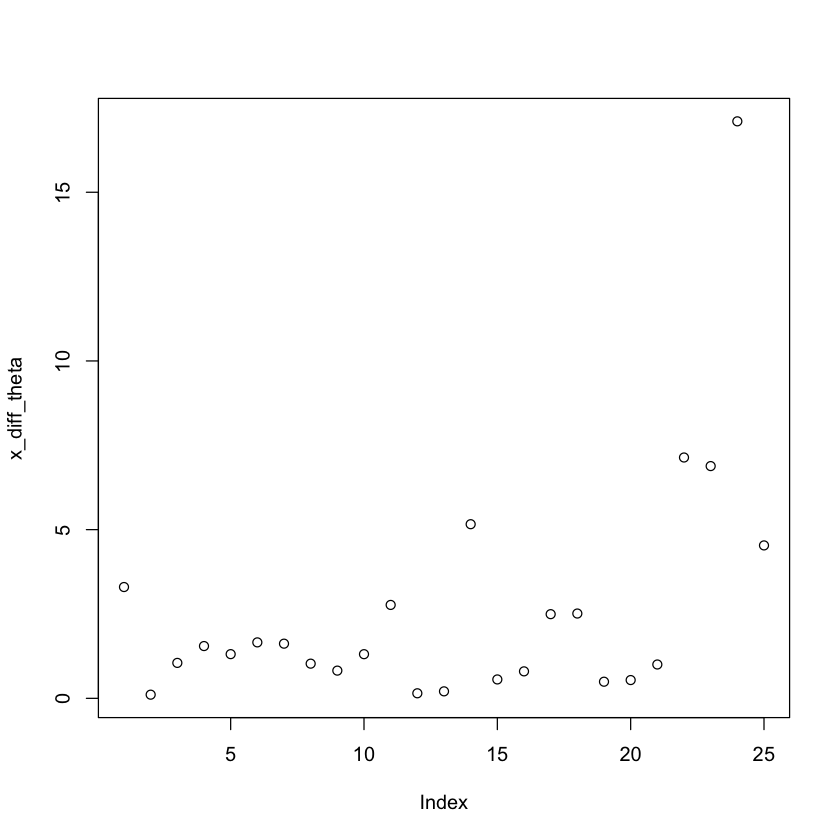

In [23]:
# Use MLE beta binomial dispersion estimate:
library(apeglm)

# mean of REF/TOT ratios:
p_x_ref.hat <- rowMeans(p_x_ref, na.rm=TRUE)
# mean of ALT/TOT ratios:
p_x_alt.hat <- rowMeans(p_x_alt, na.rm=TRUE)

# weight 0 if not HET, 1 if HET:
x_weights <- matrix(x_ref, nrow=nrow(x_ref), ncol=ncol(x_ref))
x_weights[!is.na(x_weights)] <- as.integer(1)
x_weights[is.na(x_weights)] <- as.integer(0)

# if not HET, fill REF with "1"
x_ref[is.na(x_ref)] <- as.integer(1)

# if not HET, fill ALT with "1"
x_alt[is.na(x_alt)] <- as.integer(1)

# if not HET, fill TOT with "1"
x_tot[is.na(x_tot)] <- as.integer(1)

# matrix for bbEstDisp:
x_xchr <- matrix(1,nrow=ncol(x_ref),ncol=1)

class(x_ref) <- "numeric"
class(x_alt) <- "numeric"
class(x_tot) <- "numeric"
class(x_weights) <- "numeric"

#log ratio of the estimate for REF
xref_beta.hat <- log(p_x_ref.hat) / (1 - p_x_ref.hat)
#log ratio of the estimate for ALT
xalt_beta.hat <- log(p_x_alt.hat) / (1 - p_x_alt.hat) 

# REF theta:
xref_theta <- bbEstDisp(success=x_ref, size=x_tot,
                   x=x_xchr, xref_beta.hat,
                   weights=x_weights,
                   minDisp=.01, maxDisp=20000)
# ALT theta:
xalt_theta <- bbEstDisp(success=x_alt, size=x_tot,
                   x=x_xchr, xalt_beta.hat,
                   weights=x_weights,
                   minDisp=.01, maxDisp=20000)
#plot(xref_theta)
#plot(xalt_theta)

# absolute difference of REF and ALT thetas:
x_diff_theta <- abs(xref_theta - xalt_theta)
plot(x_diff_theta)

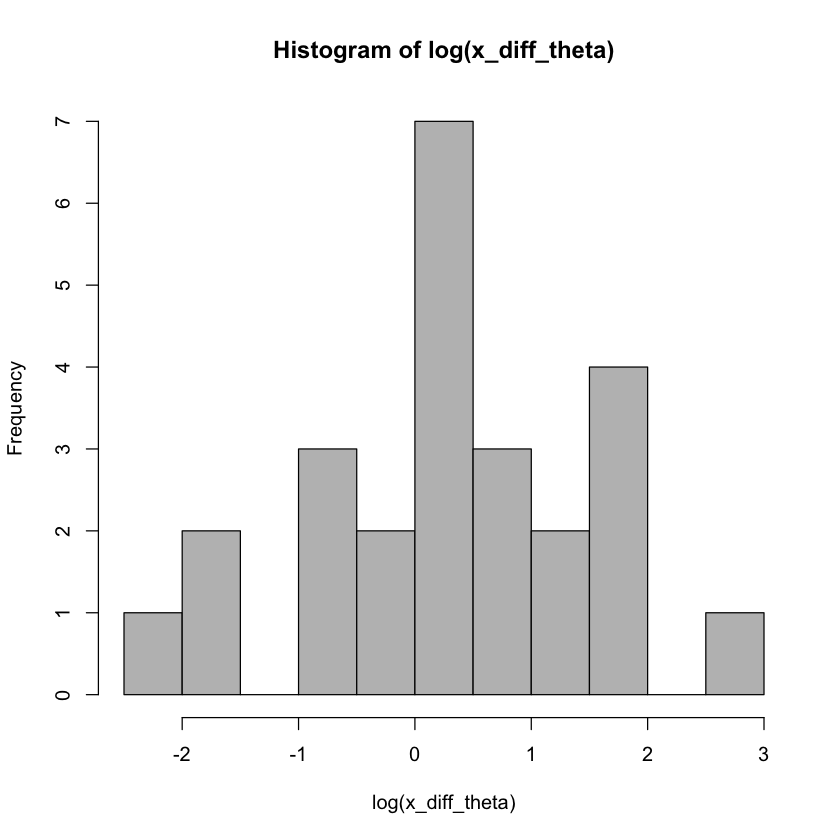

In [24]:
hist(log(x_diff_theta),breaks=10,col="grey")

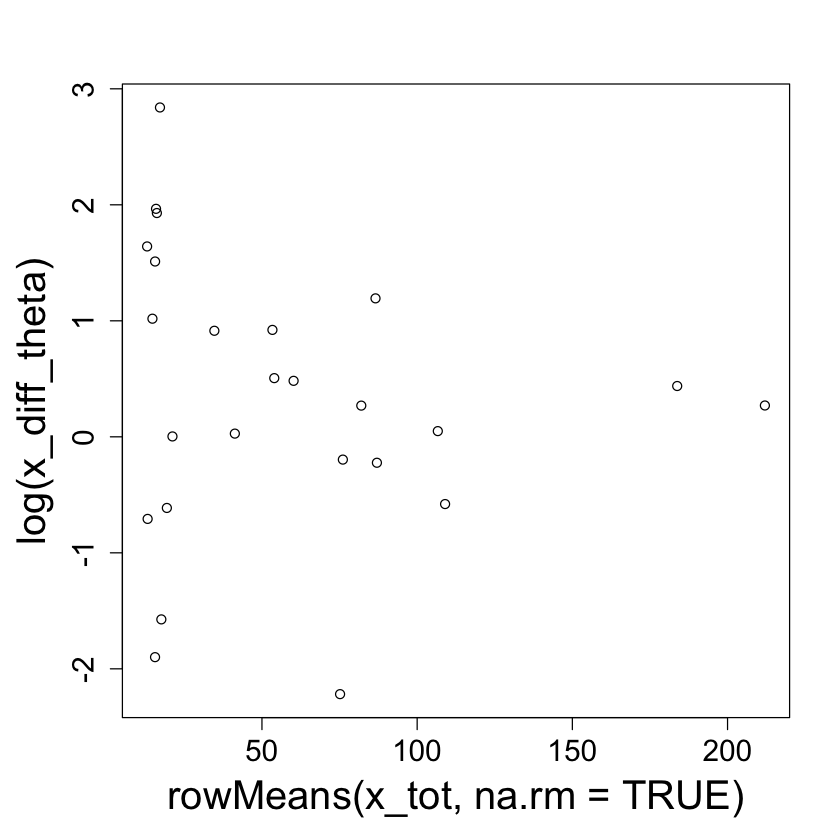

In [25]:
# MA-like-plot 
library(rafalib)
bigpar()
x_tot <- x_chrom[,c(Xtot_cols)]
colnames(x_tot) <- gsub("TOTAL_COUNT.", "", colnames(x_tot))
class(x_tot) <- "numeric"
plot(rowMeans(x_tot, na.rm=TRUE), log(x_diff_theta))